In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import csv
import random
import math
import operator

In [3]:
df=pd.read_csv('Robot2',header=None,delimiter=r'\s+')

In [4]:
temp=df[0]
df=df.drop([0,7],axis=1)
df=df.join(temp)
# df.loc[:,0]

In [5]:
df

,1,2,3,4,5,6,0
0,1,1,1,1,1,2,1
1,1,1,1,1,2,1,1
2,1,1,1,1,2,2,1
3,1,1,1,1,3,1,0
4,1,1,1,1,4,1,0
5,1,1,1,2,1,1,1
6,1,1,1,2,2,2,1
7,1,1,1,2,4,2,0
8,1,1,2,1,2,2,1
9,1,1,2,1,4,2,0


In [6]:
def euclidDistance(val1, val2, entirelength):
    distance = 0
    for x in range(entirelength):
        distance += pow((val1[x] - val2[x]), 2)
    return math.sqrt(distance)

In [7]:
def chebyshevDistance(val1, val2, entirelength):
    distance = 0
    for x in range(entirelength):
        distance = max(distance,abs(val1[x] - val2[x]))
    return distance

In [8]:
def manhattanDistance(val1, val2, entirelength):
    distance = 0
    for x in range(entirelength):
        distance += abs(val1[x] - val2[x])
    return distance

In [9]:
def Neighbor_points(train_d, test_d, k):
    distances = []
    length = len(test_d)-1
    for x in range(len(train_d)):
        dist = euclidDistance(test_d, train_d[x], length)
        distances.append((train_d[x], dist))
    distances.sort(key=lambda x: x[1])
#     print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
#         print(neighbors)
    return neighbors

In [10]:
def Neighbor_points2(train_d, test_d, k):
    distances = []
    length = len(test_d)-1
    for x in range(len(train_d)):
        dist = chebyshevDistance(test_d, train_d[x], length)
        distances.append((train_d[x], dist))
    distances.sort(key=lambda x: x[1])
#     print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
#         print(neighbors)
    return neighbors

In [11]:
def Neighbor_points1(train_d, test_d, k):
    distances = []
    length = len(test_d)-1
    for x in range(len(train_d)):
        dist = manhattanDistance(test_d, train_d[x], length)
        distances.append((train_d[x], dist))
    distances.sort(key=lambda x: x[1])
#     print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
#         print(neighbors)
    return neighbors

In [12]:
def resultss(neighbors):
    predlabel = {}
#     print(neighbors)
    for x in range(len(neighbors)):
        res = neighbors[x][-1]
        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(), reverse=True)
    return ans[0][0]

In [13]:
def accu_calc(test, predlabel):
    correct = 0
    tp,fp,tn,fn=0,0,0,0
    for x in range(len(test)):
        if test[x][-1] == predlabel[x]:
            correct += 1
        if test[x][-1]==1 and predlabel[x]==1:
            tp+=1
        if test[x][-1]==0 and predlabel[x]==1:
            fp+=1
        if test[x][-1]==0 and predlabel[x]==0:
            tn+=1
        if test[x][-1]==1 and predlabel[x]==0:
            fn+=1
    x = (tp+fn)
    y = (tp+fp)
    if x:
        rc=tp/x
    if y:
        pc=tp/y
    f1=(2*rc*pc)/(rc+pc)
    print("\nRecall: ", rc)
    print("\nPrecision: ", pc)
    print("\nF1-Score: ", f1)

    print("\nTrue pos: ",tp)
    print("\nFalse pos: ",fp)
    print("\nTrue neg: ",tn)
    print("\nFalse neg: ",fn)
    accuracy=(correct/float(len(test))) * 100.0
    return accuracy

#         print(neighbors)
#     return neighbors


### Euclidean Calculations

In [14]:
    from sklearn.model_selection import train_test_split  
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
    train,test = train_test_split(df, test_size=0.2) 
#     random.seed(0)
    pre_values=[]
    k = 5
#     print(X_test)
#     temp=X_test.to_dict('records')
#     print (temp[0])
#     fn=sys.argv[1]
#     df2=pd.read_csv(fn)
#     df2.columns=['a','b','c','d','label']
#     test=df2
    test1=test
    train1=train
    test=test.values
    train=train.values
#     print(len(train))
#     print(test)
#     for x in range(len(X_test)):
#         testSet.append()
#     neighbors=[]
    for x in range(len(test)):
        neighbors = Neighbor_points(train, test[x], k)
#         print(neighbors[x][-1])
        result = resultss(neighbors)
#         print(result)
        pre_values.append(result)
#         print('> predicted value by algo=' + result + ' and actual value by scikit=' + test[x][-1])
    accuracy = accu_calc(test, pre_values)
    print ('The Accuracy is: ', accuracy)


Recall:  1.0

Precision:  0.5714285714285714

F1-Score:  0.7272727272727273

True pos:  12

False pos:  9

True neg:  4

False neg:  0
The Accuracy is:  64.0


In [15]:
acc=[]
for i in range(1, 25):
    pre_values=[]
    knn = []
    result=[]
    for x in range(len(test)):
        knn = Neighbor_points(train, test[x], i)
#         print(knn)
        result = resultss(knn)
        pre_values.append(result)
#         print('> predicted value by algo=' + result + ' and actual value by scikit=' + test[x][-1])
    accuracy = accu_calc(test, pre_values)
    acc.append(accuracy)# plt.figure(figsize=(12, 6))  
    



Recall:  0.6666666666666666

Precision:  1.0

F1-Score:  0.8

True pos:  8

False pos:  0

True neg:  13

False neg:  4

Recall:  1.0

Precision:  0.8

F1-Score:  0.888888888888889

True pos:  12

False pos:  3

True neg:  10

False neg:  0

Recall:  1.0

Precision:  0.75

F1-Score:  0.8571428571428571

True pos:  12

False pos:  4

True neg:  9

False neg:  0

Recall:  1.0

Precision:  0.6666666666666666

F1-Score:  0.8

True pos:  12

False pos:  6

True neg:  7

False neg:  0

Recall:  1.0

Precision:  0.5714285714285714

F1-Score:  0.7272727272727273

True pos:  12

False pos:  9

True neg:  4

False neg:  0

Recall:  1.0

Precision:  0.5

F1-Score:  0.6666666666666666

True pos:  12

False pos:  12

True neg:  1

False neg:  0

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

False pos:  13

True neg:  0

False neg:  0

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

False pos:  13

True neg:  0

False neg:  0

Recall:  1

The Euclid Accuracy are:  [84.0, 88.0, 84.0, 76.0, 64.0, 52.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]


Text(0, 0.5, 'Accuracy')

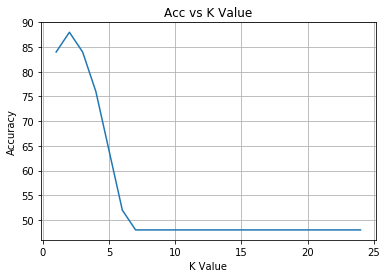

In [16]:
print ('The Euclid Accuracy are: ', acc)

plt.plot(range(1, 25), acc)
plt.title('Acc vs K Value')  
plt.xlabel('K Value')
plt.grid(True)
plt.ylabel('Accuracy')  

### Manhattan Calculations

In [17]:
    X = df.iloc[:, :-1].astype(float)  
#     print(X)
    y = df.iloc[:, 4].values
#     print(y)
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
#     train,test = train_test_split(df, test_size=0.2) 
#     random.seed(0)
    pre_values=[]
    k = 5
#     print(X_test)
#     temp=X_test.to_dict('records')
#     print (temp[0])
#     test1=test
#     train1=train
#     test=test.values
#     train=train.values
#     test_y=test('label')
#     print(len(train))
#     print(test)
#     for x in range(len(X_test)):
#         testSet.append()
    for x in range(len(test)):
        neighbors = Neighbor_points1(train, test[x], k)
#         print(neighbors[x][-1])
        result = resultss(neighbors)
        pre_values.append(result)
#         print('> predicted value by algo=' + result + ' and actual value by scikit=' + test[x][-1])
#     accuracy = accu_calc(test, pre_values)
    print ('The Accuracy is: ', accuracy)

The Accuracy is:  48.0


In [18]:
acc=[]
for i in range(1, 25):
    pre_values=[]
    knn = []
    result=[]
    for x in range(len(test)):
        knn = Neighbor_points1(train, test[x], i)
#         print(knn)
        result = resultss(knn)
        pre_values.append(result)
#         print('> predicted value by algo=' + result + ' and actual value by scikit=' + test[x][-1])
    accuracy = accu_calc(test, pre_values)
    acc.append(accuracy)
# print(acc)



Recall:  0.6666666666666666

Precision:  1.0

F1-Score:  0.8

True pos:  8

False pos:  0

True neg:  13

False neg:  4

Recall:  1.0

Precision:  0.8

F1-Score:  0.888888888888889

True pos:  12

False pos:  3

True neg:  10

False neg:  0

Recall:  1.0

Precision:  0.75

F1-Score:  0.8571428571428571

True pos:  12

False pos:  4

True neg:  9

False neg:  0

Recall:  1.0

Precision:  0.6666666666666666

F1-Score:  0.8

True pos:  12

False pos:  6

True neg:  7

False neg:  0

Recall:  1.0

Precision:  0.5454545454545454

F1-Score:  0.7058823529411764

True pos:  12

False pos:  10

True neg:  3

False neg:  0

Recall:  1.0

Precision:  0.5

F1-Score:  0.6666666666666666

True pos:  12

False pos:  12

True neg:  1

False neg:  0

Recall:  1.0

Precision:  0.5

F1-Score:  0.6666666666666666

True pos:  12

False pos:  12

True neg:  1

False neg:  0

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

False pos:  13

True neg:  0

False neg:  0

Recall:  1

The Manhattan Accuracy are:  [84.0, 88.0, 84.0, 76.0, 60.0, 52.0, 52.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]


Text(0, 0.5, 'Accuracy')

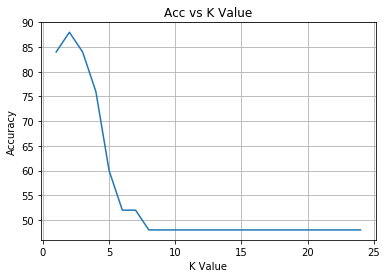

In [19]:
print ('The Manhattan Accuracy are: ', acc)
#     print ('The Accuracy is: ', accuracy)
#     print(knn)
# plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), acc)
plt.title('Acc vs K Value')  
plt.xlabel('K Value')
plt.grid(True)
plt.ylabel('Accuracy')  

### Chebyshev Calculations

In [27]:
    X = df.iloc[:, :-1].astype(float)  
#     print(X)
    y = df.iloc[:, 4].values
#     print(y)
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
#     train,test = train_test_split(df, test_size=0.2) 
#     random.seed(0)
    pre_values=[]
    k = 5
#     print(X_test)
#     temp=X_test.to_dict('records')
#     print (temp[0])
#     test1=test
#     train1=train
#     test=test.values
#     train=train.values
#     test_y=test('label')
#     print(len(train))
#     print(test)
#     for x in range(len(X_test)):
#         testSet.append()
    for x in range(len(test)):
        neighbors = Neighbor_points2(train, test[x], k)
#         print(neighbors[x][-1])
        result = resultss(neighbors)
        pre_values.append(result)
#         print('> predicted value by algo=' + result + ' and actual value by scikit=' + test[x][-1])
    accuracy = accu_calc(test, pre_values)
    print ('The Accuracy is: ', accuracy)

[1 2 2 3 4 1 2 4 2 4 2 4 4 1 1 3 3 3 2 2 3 1 1 2 2 3 4 3 4 1 2 2 1 2 2 2 4
 3 4 1 3 1 1 2 4 3 4 4 1 1 4 4 1 1 2 3 4 2 4 1 3 4 1 2 1 2 3 3 4 2 1 3 3 4
 3 1 2 2 3 3 1 2 4 3 4 1 2 4 1 2 3 4 1 4 2 3 4 1 2 4 3 1 2 3 1 1 3 4 3 4 4
 1 2 2 4 1 1 2 3 1 3 4]

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

False pos:  13

True neg:  0

False neg:  0
The Accuracy is:  48.0


In [26]:
acc=[]
for i in range(1, 25):
    pre_values=[]
    knn = []
    result=[]
    for x in range(len(test)):
        knn = Neighbor_points2(train, test[x], i)
#         print(knn)
        result = resultss(knn)
        pre_values.append(result)
#         print('> predicted value by algo=' + result + ' and actual value by scikit=' + test[x][-1])
    accuracy = accu_calc(test, pre_values)
    acc.append(accuracy)




Recall:  0.75

Precision:  0.6428571428571429

F1-Score:  0.6923076923076924

True pos:  9

False pos:  5

True neg:  8

False neg:  3

Recall:  0.8333333333333334

Precision:  0.625

F1-Score:  0.7142857142857143

True pos:  10

False pos:  6

True neg:  7

False neg:  2

Recall:  1.0

Precision:  0.5217391304347826

F1-Score:  0.6857142857142856

True pos:  12

False pos:  11

True neg:  2

False neg:  0

Recall:  1.0

Precision:  0.5217391304347826

F1-Score:  0.6857142857142856

True pos:  12

False pos:  11

True neg:  2

False neg:  0

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

False pos:  13

True neg:  0

False neg:  0

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

False pos:  13

True neg:  0

False neg:  0

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

False pos:  13

True neg:  0

False neg:  0

Recall:  1.0

Precision:  0.48

F1-Score:  0.6486486486486487

True pos:  12

Fals

The Chebyshev Accuracy are:  [68.0, 68.0, 56.00000000000001, 56.00000000000001, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]


Text(0, 0.5, 'Accuracy')

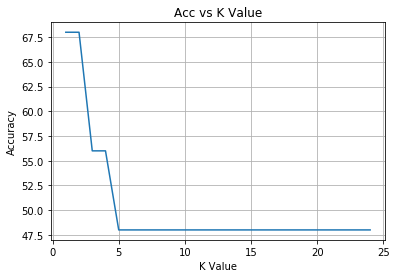

In [22]:
print ('The Chebyshev Accuracy are: ', acc)
# print(acc)
#     print ('The Accuracy is: ', accuracy)
#     print(knn)

# plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), acc)
plt.title('Acc vs K Value')  
plt.xlabel('K Value')
plt.grid(True)
plt.ylabel('Accuracy')  

In [23]:
y_train=train1.pop(0)
X_train=train1
y_test=test1.pop(0)
X_test=test1
train1.head()

,1,2,3,4,5,6
3,1,1,1,1,3,1
7,1,1,1,2,4,2
8,1,1,2,1,2,2
104,3,2,2,2,1,2
27,1,2,2,1,3,1


### Accuracy using SKlearn

In [29]:
X = df.iloc[:, :-1].values 
# print(X)
y = df.iloc[:, 6].values  
# print(y)
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))  

[[1 1 1 1 1 2]
 [1 1 1 1 2 1]
 [1 1 1 1 2 2]
 [1 1 1 1 3 1]
 [1 1 1 1 4 1]
 [1 1 1 2 1 1]
 [1 1 1 2 2 2]
 [1 1 1 2 4 2]
 [1 1 2 1 2 2]
 [1 1 2 1 4 2]
 [1 1 2 2 2 2]
 [1 1 2 2 4 1]
 [1 1 2 2 4 2]
 [1 1 2 3 1 1]
 [1 1 2 3 1 2]
 [1 1 2 3 3 1]
 [1 1 2 3 3 2]
 [1 2 1 1 3 1]
 [1 2 1 2 2 1]
 [1 2 1 2 2 2]
 [1 2 1 2 3 1]
 [1 2 1 3 1 1]
 [1 2 1 3 1 2]
 [1 2 1 3 2 1]
 [1 2 1 3 2 2]
 [1 2 1 3 3 2]
 [1 2 1 3 4 1]
 [1 2 2 1 3 1]
 [1 2 2 1 4 2]
 [1 2 2 2 1 1]
 [1 2 2 2 2 1]
 [1 2 2 2 2 2]
 [1 2 2 3 1 1]
 [1 2 2 3 2 1]
 [1 2 2 3 2 2]
 [1 3 1 1 2 1]
 [1 3 1 1 4 1]
 [1 3 1 2 3 2]
 [1 3 1 2 4 1]
 [1 3 1 3 1 1]
 [1 3 1 3 3 1]
 [1 3 2 1 1 1]
 [1 3 2 1 1 2]
 [1 3 2 1 2 1]
 [1 3 2 1 4 2]
 [1 3 2 2 3 2]
 [1 3 2 2 4 2]
 [1 3 2 3 4 1]
 [2 1 1 1 1 1]
 [2 1 1 1 1 2]
 [2 1 1 1 4 1]
 [2 1 1 1 4 2]
 [2 1 1 2 1 1]
 [2 1 1 2 1 2]
 [2 1 1 3 2 2]
 [2 1 1 3 3 2]
 [2 1 1 3 4 1]
 [2 1 2 1 2 2]
 [2 1 2 2 4 1]
 [2 1 2 3 1 2]
 [2 2 1 1 3 2]
 [2 2 1 1 4 2]
 [2 2 1 2 1 2]
 [2 2 1 2 2 1]
 [2 2 1 3 1 1]
 [2 2 1 3 2 2]
 [2 2 1 3 